In [86]:
import os
import json


kaggle_token = {
    "username": "sakthivelllllllll",
    "key": "38a56437a7c3834ea1bd7a62e92b06bf"
}


os.makedirs("/root/.kaggle", exist_ok=True)


with open("/root/.kaggle/kaggle.json", "w") as file:
    json.dump(kaggle_token, file)


!chmod 600 /root/.kaggle/kaggle.json

print(" Kaggle authentication setup completed.")

 Kaggle authentication setup completed.


In [ ]:

!kaggle datasets download -d maitridsavla/alzimer-segmented


Dataset URL: https://www.kaggle.com/datasets/maitridsavla/alzimer-segmented
License(s): unknown
  0% 0.00/32.4M [00:00<?, ?B/s]
100% 32.4M/32.4M [00:00<00:00, 1.25GB/s]


In [85]:
import zipfile


with zipfile.ZipFile("alzimer-segmented.zip", 'r') as zip_ref:
    zip_ref.extractall("cancer")

print("Dataset unzipped!")

Dataset unzipped!


In [88]:
cancer_classes = os.listdir("/content/cancer/segmented_images/train")
print(" Flower classes:", cancer_classes)

 Flower classes: ['VeryMildDemented', 'MildDemented', 'ModerateDemented', 'NonDemented']


In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [38]:
IMG_SIZE=224
BATCH_SIZE=32

In [39]:
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)


In [40]:
train_generator = train_datagen.flow_from_directory( '/content/cancer/segmented_images/train',
                                                    target_size=(IMG_SIZE, IMG_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical',
                                                     subset='training')

Found 4098 images belonging to 4 classes.


In [41]:

val_generator = train_datagen.flow_from_directory( '/content/cancer/segmented_images/train',
                                                  target_size=(IMG_SIZE, IMG_SIZE),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
subset='validation')

Found 1023 images belonging to 4 classes.


In [42]:
class_names=list(train_generator.class_indices.keys())
print(class_names)
print(train_generator.class_indices)

['MildDemented', 'ModerateDemented', 'NonDemented', 'VeryMildDemented']
{'MildDemented': 0, 'ModerateDemented': 1, 'NonDemented': 2, 'VeryMildDemented': 3}


In [76]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    23,888,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,907,908 (91.20 MB)

 Trainable params: 23,907,908 (91.20 MB)

 Non-trainable params: 0 (0.00 B)

In [77]:
model.fit(train_generator,epochs=3,validation_data=val_generator,batch_size=BATCH_SIZE)

Epoch 1/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 227s 2s/step - accuracy: 0.4974 - loss: 1.2502 - val_accuracy: 0.3568 - val_loss: 1.3257
Epoch 2/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 218s 2s/step - accuracy: 0.7597 - loss: 0.6122 - val_accuracy: 0.3363 - val_loss: 1.8543
Epoch 3/3
129/129 ━━━━━━━━━━━━━━━━━━━━ 213s 2s/step - accuracy: 0.8678 - loss: 0.3397 - val_accuracy: 0.4282 - val_loss: 1.8156


In [78]:
model.save('/content/cancer/segmented_images/Alzheimer_model.h5')

In [79]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
model=load_model("/content/cancer/segmented_images/Alzheimer_model.h5")
print('Model Loaded')

Model Loaded


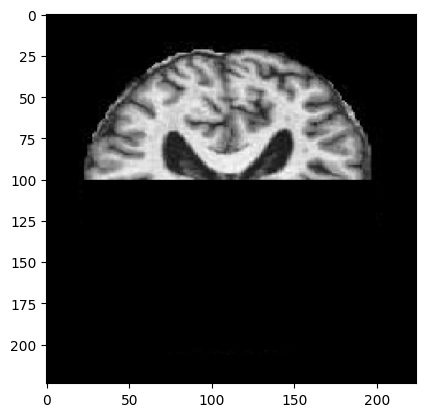

In [80]:
test_image_path="/content/cancer/segmented_images/train/VeryMildDemented/verymildDem1042.jpg"
img=image.load_img(test_image_path,target_size=(224,224))
plt.imshow(img)
plt.axis()
plt.show()

In [81]:
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array /= 255.

In [82]:
prediction = model.predict(img_array)
ind=np.argmax(prediction)
prediction=prediction[0][ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [83]:
predicted_class = inv_labels[ind]
print(" Predicted class:", predicted_class)

if predicted_class == "NonDemented":
    print(" You do NOT have Alzheimer’s.")
else:
    print(f" Alzheimer’s stage detected: {predicted_class}")



 Predicted class: VeryMildDemented
 Alzheimer’s stage detected: VeryMildDemented
